# Regressing 1D Data with a Single Neuron

This notebook provides you with a complete code
example that loads the data contained in `data_reg_1d_clean.csv`, trains a neuron to fit them, and finally uses the trained neuron to predict the values of the data in `data_reg_1d_clean_test.csv`.

## Loading the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_1d_nonlinear.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[-0.79053779]
 [-1.39344279]
 [-0.37787242]
 [-1.10111982]
 [-1.27358957]
 [-0.2643897 ]
 [ 0.44140346]
 [ 0.42640938]
 [-0.15272506]
 [-0.00933567]]
y_gt: [[-0.2952689 ]
 [-0.59672139]
 [-0.08893621]
 [-0.45055991]
 [-0.53679478]
 [-0.03219485]
 [ 0.32070173]
 [ 0.31320469]
 [ 0.02363747]
 [ 0.09533216]]


## Visualizing the Data

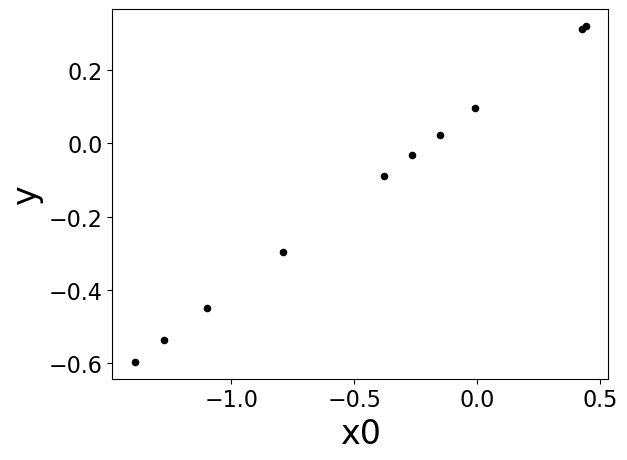

In [2]:
from plotting import plot_data_1d

plot_data_1d(x, y_gt, fig_name="fig_02_05a.pdf")  ### plot_data_1d(x, y_gt)

## Implementing a Single Neuron

Create a single neuron with one scalar weigth `w0` and one input `x` (which can be a scalar or a vector corresponding to multiple inputs) ...

In [3]:
def neuron_reg_1d(w0, x):
    """Artificial neuron for 1D regression."""
    return w0 * x

... randomly initialize its weight ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
w0 = rng.standard_normal()

... obtain its predition `y_p` for the input data (which has the same shape as `x`) ...

In [5]:
y_p = neuron_reg_1d(w0, x)

... and visualize its predictions.

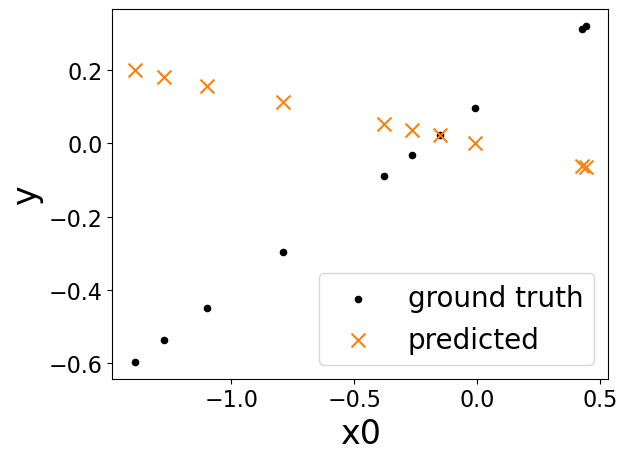

In [6]:
from plotting import plot_pred_1d

### plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x))

## Training the Neuron

Train the neuron ...

In [7]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # Select random sample.
    x0_selected = x[selected]
    y_gt_selected = y_gt[selected]
    
    y_p_selected = neuron_reg_1d(w0, x0_selected) # Neuron prediction.
    
    error = y_p_selected - y_gt_selected # Calculate error.
    
    w0 -= eta * error * x0_selected # Update neuron weight.

    print(f"i={i} w0={w0[0]:.2f} error={error[0]:.2f}")

i=0 w0=-0.14 error=-0.00
i=1 w0=-0.03 error=0.80
i=2 w0=-0.03 error=-0.10
i=3 w0=-0.03 error=-0.02
i=4 w0=0.06 error=0.64
i=5 w0=0.07 error=-0.29
i=6 w0=0.07 error=0.01
i=7 w0=0.09 error=0.24
i=8 w0=0.15 error=0.47
i=9 w0=0.19 error=0.28
i=10 w0=0.18 error=-0.02
i=11 w0=0.18 error=-0.05
i=12 w0=0.21 error=0.25
i=13 w0=0.24 error=0.22
i=14 w0=0.24 error=0.11
i=15 w0=0.28 error=0.26
i=16 w0=0.29 error=-0.20
i=17 w0=0.29 error=-0.07
i=18 w0=0.29 error=0.07
i=19 w0=0.29 error=-0.02
i=20 w0=0.29 error=-0.02
i=21 w0=0.32 error=0.19
i=22 w0=0.34 error=0.15
i=23 w0=0.34 error=-0.08
i=24 w0=0.35 error=-0.17
i=25 w0=0.35 error=-0.17
i=26 w0=0.36 error=-0.16
i=27 w0=0.36 error=-0.06
i=28 w0=0.37 error=0.08
i=29 w0=0.37 error=0.00
i=30 w0=0.38 error=0.08
i=31 w0=0.38 error=-0.10
i=32 w0=0.38 error=-0.01
i=33 w0=0.38 error=-0.10
i=34 w0=0.39 error=-0.15
i=35 w0=0.39 error=0.06
i=36 w0=0.40 error=0.05
i=37 w0=0.41 error=-0.14
i=38 w0=0.41 error=0.00
i=39 w0=0.41 error=-0.14
i=40 w0=0.42 error=-0.14


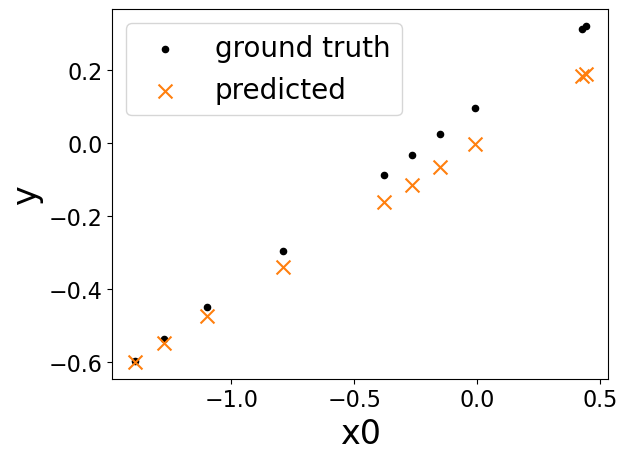

In [8]:
plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x), fig_name="fig_02_05b.pdf")  ### plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x))

## Testing the Trained Neuron

Check how the trained neuron works on the test data.

In [9]:
### (x_test, y_gt_test) = load_data(filename="data_reg_1d_clean_test.csv")

### plot_pred_1d(x_test, y_gt_test, y_p=neuron_reg_1d(w0, x_test))